学习sklearn 最近邻。

# K近邻分类

## 基础使用

In [25]:
# 测试K近邻分类
# 加载必要的库
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 加载数据集
X,y = make_classification(n_samples=1000, n_features=10, random_state=42)
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建K近邻分类器实例
knn = KNeighborsClassifier(n_neighbors=3)

# 训练分类器
knn.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = knn.predict(X_test)

# 得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.79

In [ ]:
# 测试K近邻分类
# 加载必要的库
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 加载数据集
X,y = make_classification(n_samples=1000, n_features=10, random_state=42)
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建K近邻分类器实例
knn = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree")

# 训练分类器
knn.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = knn.predict(X_test)

# 得分
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.79

## 调参

In [ ]:
# KNN调参
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1为曼哈顿距离，2为欧氏距离
}

# 创建网格搜索对象
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# 进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
best_params = grid_search.best_params_
best_params

# {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [27]:
# 传入最佳参数训练
knn_best = KNeighborsClassifier(**best_params)

# 训练分类器
knn_best.fit(X_train, y_train)

# 使用测试集进行预测
y_pred_best = knn_best.predict(X_test)

# 得分
accuracy_best = accuracy_score(y_test, y_pred_best)
accuracy_best

0.84

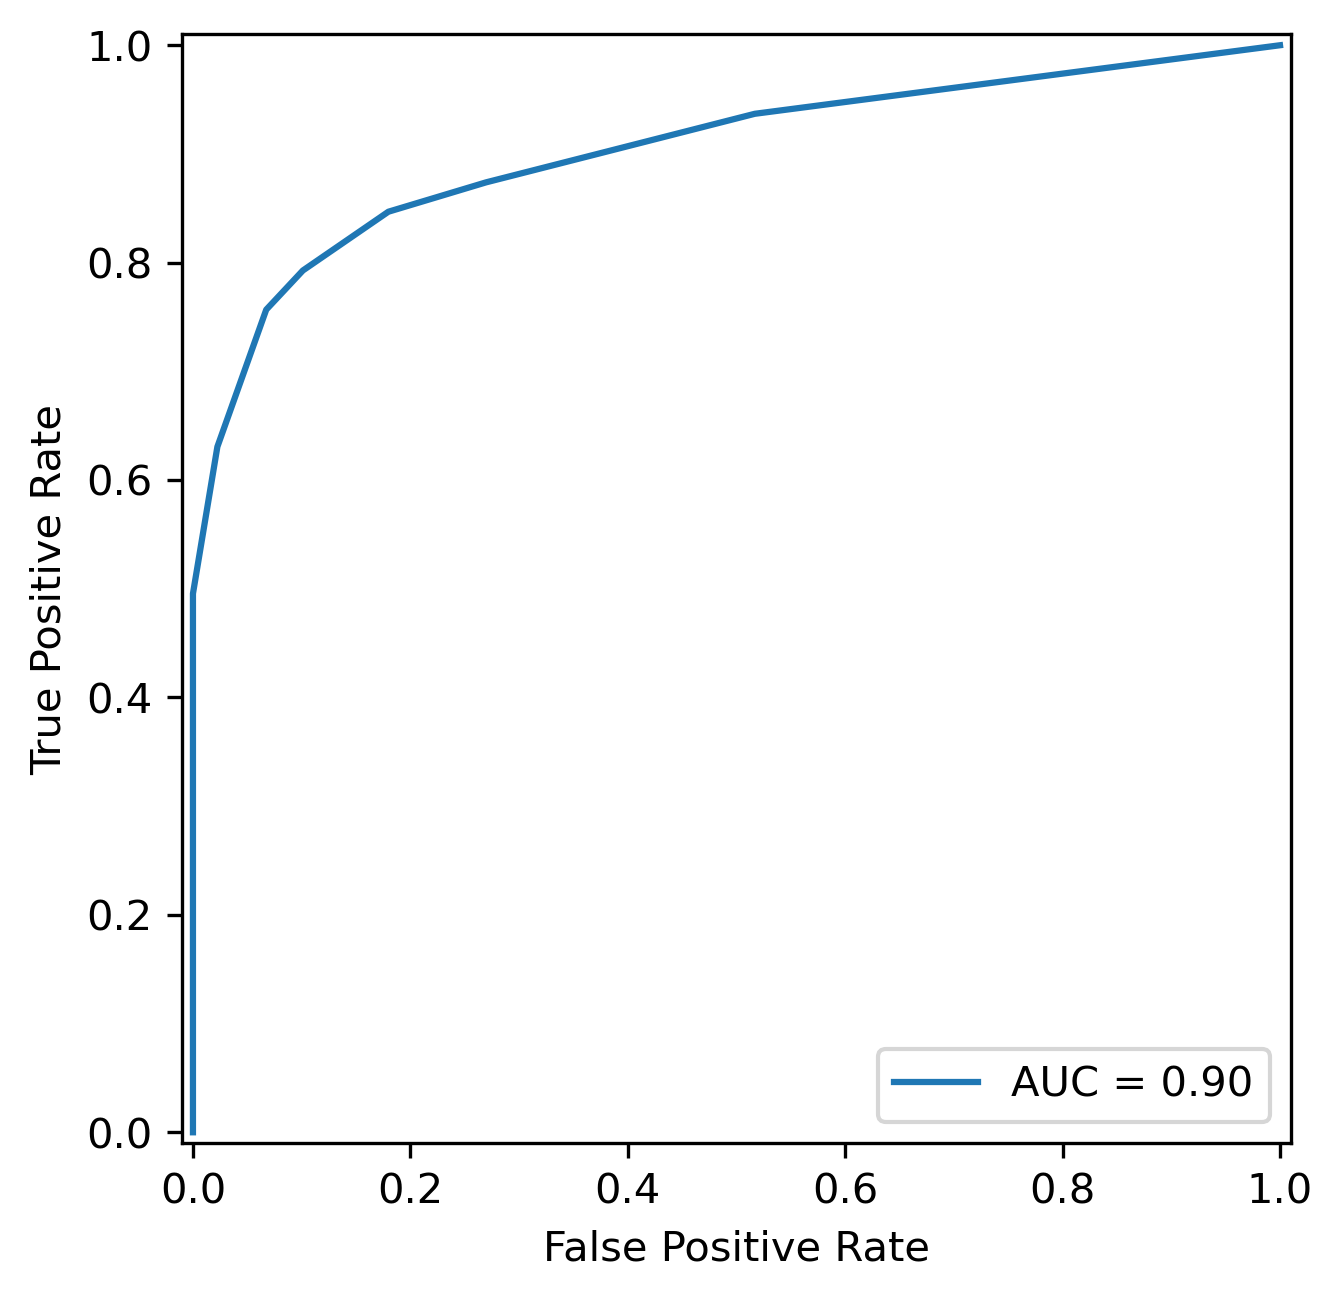

In [28]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, knn_best.predict_proba(X_test)[:, 1], pos_label=1)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
# 修改dpi
plt.rcParams['figure.dpi'] = 300
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

# K近邻回归

## 基础使用

In [30]:
# 测试K近邻回归
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# 加载数据集
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建K近邻回归器实例
knn_reg = KNeighborsRegressor(n_neighbors=3)

# 训练回归器
knn_reg.fit(X_train, y_train)

# 使用测试集进行预测
y_pred_reg = knn_reg.predict(X_test)

# 得分
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_reg)
mse

4396.4108222462

## 调参

In [ ]:
# 测试调参
from sklearn.model_selection import GridSearchCV
# 定义参数范围
param_grid_reg = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1为曼哈顿距离，2为欧氏距离
}

# 创建网格搜索对象
grid_search_reg = GridSearchCV(KNeighborsRegressor(), param_grid_reg, cv=5, scoring='neg_mean_squared_error')

# 进行网格搜索
grid_search_reg.fit(X_train, y_train)

# 输出最佳参数和最佳得分
best_params_reg = grid_search_reg.best_params_
best_params_reg

# {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

# Radius近邻

## 基础使用

In [33]:
# 测试radius邻近分类
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# 加载Iris数据集
iris = load_iris()
X, y = iris.data, iris.target
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 创建Radius邻近分类器实例
radius_knn = RadiusNeighborsClassifier(radius=1.0, algorithm='auto')
# 训练分类器
radius_knn.fit(X_train, y_train)
# 使用测试集进行预测
y_pred_radius = radius_knn.predict(X_test)
# 得分
accuracy_radius = accuracy_score(y_test, y_pred_radius)
accuracy_radius

1.0